
# Decision Tree: Iris dataset

### We have to create a Decision Tree classifier model to classify flowers into one of the three given possible classes

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding and Cleaning the Data

In [5]:
import sys
sys.path.insert(0,'/usr/local/lib/python3.9/site-packages')
sys.path

['/usr/local/lib/python3.9/site-packages',
 'c:\\Program Files\\Python312\\python312.zip',
 'c:\\Program Files\\Python312\\DLLs',
 'c:\\Program Files\\Python312\\Lib',
 'c:\\Program Files\\Python312',
 '',
 'C:\\Users\\visha\\AppData\\Roaming\\Python\\Python312\\site-packages',
 'C:\\Users\\visha\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32',
 'C:\\Users\\visha\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32\\lib',
 'C:\\Users\\visha\\AppData\\Roaming\\Python\\Python312\\site-packages\\Pythonwin',
 'c:\\Program Files\\Python312\\Lib\\site-packages',
 'c:\\Program Files\\Python312\\Lib\\site-packages\\vboxapi-1.0-py3.12.egg']

### Import Libraries

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
%pip install pydotplus
%pip install graphviz
import pydotplus, graphviz

import warnings
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import the IRIS Dataset

In [7]:
iris = pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Exploratory Data Analysis

In [8]:
classes = iris['Species'].unique().tolist()
classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [9]:
iris.groupby(['Species']).mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Model Building and Evaluation

### Create the Predictor and Target sets

In [11]:
# Putting feature variable to X
X = iris.drop('Species',axis=1)

# Putting response variable to y
y = iris['Species']

### Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state = 99)
X_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,11,5.4,3.7,1.5,0.2
25,26,5.0,3.0,1.6,0.2
13,14,4.3,3.0,1.1,0.1
131,132,7.9,3.8,6.4,2.0
65,66,6.7,3.1,4.4,1.4


### Create a DecisionnTreeClassifier object and Train 

In [13]:
dt_iris = DecisionTreeClassifier()
dt_iris.fit(X_train, y_train)

DecisionTreeClassifier()

### Making Predictions on Training set

In [14]:
y_pred_train = dt_iris.predict(X_train)

print(classification_report(y_train, y_pred_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



#### Printing confusion matrix and accuracy

In [15]:
print(confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))

[[38  0  0]
 [ 0 32  0]
 [ 0  0 35]]
1.0


### Making predictions on the Test Data

In [16]:
y_pred_default = dt_iris.predict(X_test)

print(classification_report(y_test, y_pred_default))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [17]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[12  0  0]
 [ 0 18  0]
 [ 0  0 15]]
1.0


### Plotting the Decision Tree

To visualise decision trees in python, you need to install certain external libraries. You can read about the process in detail here: http://scikit-learn.org/stable/modules/tree.html

We need the ```graphviz``` library to plot a tree.

### Hyperparameter Tuning

## Optimise Hyperparameters using Grid GridSearchCV and K-Fold Cross Validation

### Finding optimum max_depth

In [18]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [19]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003197,0.000749,0.001808,0.000743,1,{'max_depth': 1},0.714286,0.714286,0.714286,0.666667,...,0.695238,0.023328,9,0.690476,0.690476,0.690476,0.702381,0.702381,0.695238,0.005832
1,0.002404,0.000496,0.001395,0.000493,2,{'max_depth': 2},1.000000,0.952381,1.000000,1.000000,...,0.990476,0.019048,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.002197,0.000391,0.001602,0.000493,3,{'max_depth': 3},1.000000,0.952381,1.000000,1.000000,...,0.990476,0.019048,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.001996,0.000630,0.001799,0.000402,4,{'max_depth': 4},1.000000,0.952381,1.000000,1.000000,...,0.990476,0.019048,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.002181,0.000406,0.001198,0.000396,5,{'max_depth': 5},1.000000,0.952381,1.000000,1.000000,...,0.990476,0.019048,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


Now let's visualize how train and test score changes with max_depth.

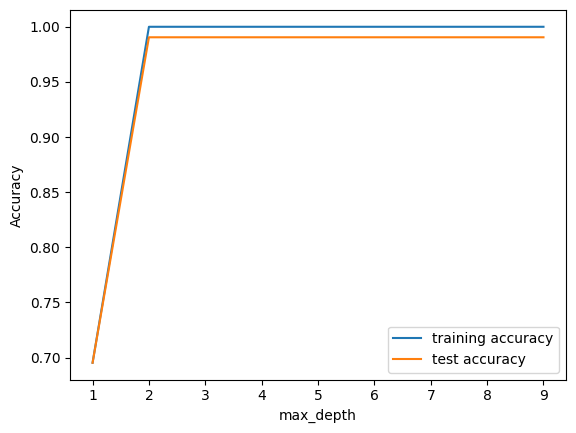

In [20]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<hr>

### Tuning min_samples_leaf

In [21]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(1, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [22]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002808,0.000755,0.001752,0.000415,1,{'min_samples_leaf': 1},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.002634,0.001224,0.001558,0.000508,4,{'min_samples_leaf': 4},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.002232,0.000386,0.001994,0.000617,7,{'min_samples_leaf': 7},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.002359,0.000504,0.001836,0.000418,10,{'min_samples_leaf': 10},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.002812,0.000731,0.001802,0.000402,13,{'min_samples_leaf': 13},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


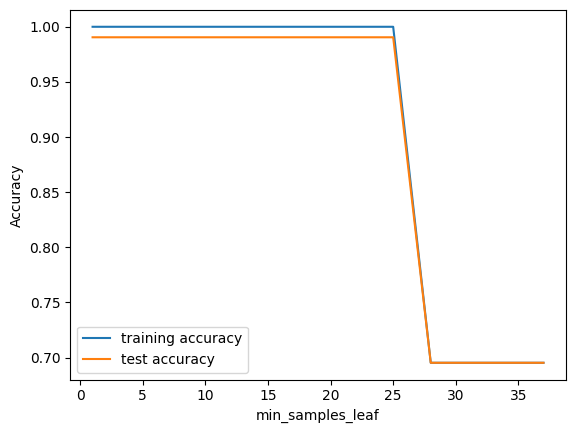

In [23]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning min_samples_split

In [24]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(3, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(3, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [25]:
# Print the results of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002806,0.000760,0.001989,0.000618,3,{'min_samples_split': 3},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.002210,0.000421,0.002002,0.000004,6,{'min_samples_split': 6},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.003399,0.000492,0.002446,0.000560,9,{'min_samples_split': 9},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.003199,0.000400,0.002425,0.000477,12,{'min_samples_split': 12},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.003001,0.000634,0.002401,0.000491,15,{'min_samples_split': 15},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


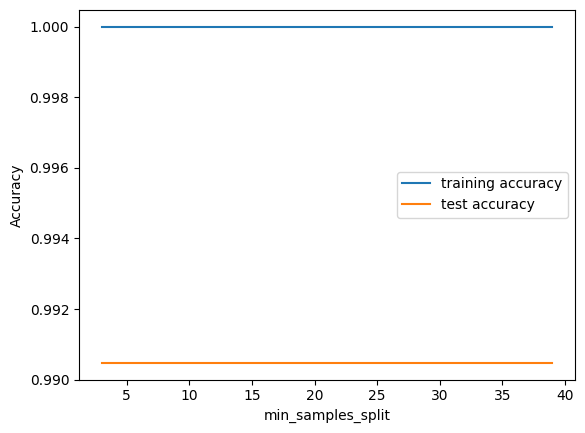

In [26]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [27]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 40, 2),
    'min_samples_split': range(2, 30, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
iristree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = iristree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 40, 2),
                         'min_samples_split': range(2, 30, 2)},
             verbose=1)

In [28]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002399,0.000805,0.002247,0.001486,entropy,1,1,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
1,0.002424,0.000521,0.001397,0.000488,entropy,1,1,4,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
2,0.002007,0.001101,0.001382,0.000481,entropy,1,1,6,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
3,0.002425,0.000848,0.001143,0.000413,entropy,1,1,8,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
4,0.002801,0.000762,0.001601,0.000502,entropy,1,1,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,0.001992,0.000021,0.001399,0.000488,gini,9,39,20,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5036,0.002170,0.000431,0.002000,0.000631,gini,9,39,22,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5037,0.002017,0.000037,0.001401,0.000489,gini,9,39,24,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5038,0.001809,0.000409,0.001958,0.000851,gini,9,39,26,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137


In [29]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9904761904761905
DecisionTreeClassifier(criterion='entropy', max_depth=2)


### Running the model with best parameters obtained from grid search

In [30]:
# model with optimal hyperparameters
iristree1 = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=3,
                                  min_samples_split=2)
iristree1.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=100)

In [31]:
# accuracy score
iristree1.score(X_test,y_test)

1.0

In [32]:
# Names for plotting
features = X.columns.tolist()                 # ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = sorted(y.unique().tolist())     # ['Iris-setosa','Iris-versicolor','Iris-virginica']

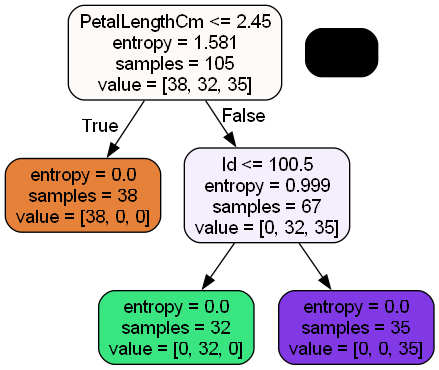

In [33]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(iristree1, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

You can see that this tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.

In [34]:
# tree with max_depth = 3
iristree2 = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=4,
                                  min_samples_split=4)
iristree2.fit(X_train, y_train)

# score
print(iristree2.score(X_test,y_test))

1.0


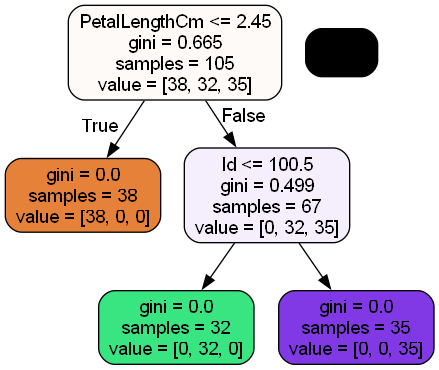

In [35]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(iristree2, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [36]:
# Classification Metrix
from sklearn.metrics import classification_report,confusion_matrix
y_pred = iristree1.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [37]:
# Print the Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[12  0  0]
 [ 0 18  0]
 [ 0  0 15]]
